# Bias, variance and generalisation

## Prerequisites
- [Gradient based optimisation]()

This notebook will introduce some core concepts in machine learning.
- **Bias** - are we optimising for the right thing
- **Variance** - 

## The data generating, empirical, training and test distributions 

Imagine an unsupervised dataset (with only input features, no output labels), where every datapoint is the height of a person. 
Not all values of height appear in this dataset:
- It is very unlikely to include an example of someone whos height was 3 meters. 
- It is also unlikely to include examples of someone whos height is 0.3 meters.  
- We know that it's impossible for any value to be negative!

Why is this?

They have these heights because naturally, life generates people with these particular dimensions.
Not all heights are distributed to an equal number of people - some heights are more likely than others.
Real examples are sampled from the **data generating distribution**, $p_{data}$.

The values which appear in the dataset are the heights of people who were sampled from the whole population. 
The population contains many people of many different heights.
So the values in our dataset makes up an **empirical distribution**.
That is, this distribution is what we expect the data generating distribution to look like.
We hope that this training distribution is **representative** of the data generating distribution.

We can then split our empirically distributed dataset into a training set and a testing set, which define the training distribution, $p_{train}$, and test distribution, $p_{test}$ of our dataset.

### Another example
Imagine an unsupervised image dataset. Images from the data generating distibution, $p_{data}$ look like something that you actually might see in real life, rather than something random or psychadelic. Our empirical distribution is a subset of these images from the data generating distibution. We then split this dataset into our train and test sets.

### The supervised dataset case

Extending the idea to supervised datasets, the data generating distribution controls the likelihood of any particular input-output pair. The data generating distribution of a dataset of people's heights as inputs and their ages as outputs (for predicting age from height maybe) is very unlikely to generate a pair like $(height=3 \ meters, age=25 \ years)$, but this distribution will define what examples are most likely to be sampled in the empirical distribution of our dataset.

### How classifiers use these distributions to make discrete predictions

Classifiers predict probabilities of an example being a member of a particular class, the function which leads to each output () is exactly trying to model the data generating distribution for each of those classes.
Each class will essentially be its own dataset, with its own data generating distribution (all examples) and its own empirical distribution.

# classifier img

### How regression models use these distributions to make continuous predictions

Regression models predict continuous values from a supervised dataset. They do not predict the probability of the input being a member of some class, but rather they predict the most likely value to be sampled from a Gaussian probability distribution over that input variable taking that particular value, and then output the most likely value to be sampled from that distribution as a prediction (see more in the [maximum likelihood notebook]())

# argmax p(x|y) img

## Bias

When we train our models, we need to make sure that they are being optimised for the right thing.

If we try to fit a curve with a straight line, the line's parameters may converge to values that produce the minimum loss (best fit). But it certainly wont actually represent the curved input-output relationship that we need. 

In this case, our model is biased to modelling a linear function, when in reality the true function is not linear, its curved.

Let's look at that. Run the cell below to create a linear model and optimise its parameters to best fit a cubic function.

X: [ -5.51020408  -6.73469388  -5.10204082   8.7755102    5.51020408
  -5.10204082 -10.          -4.69387755] 

Y: [-136.94039048 -260.10335829 -106.77948814  752.80792867  197.66508853
 -106.77948814 -900.          -81.38530714] 



/home/ice/.local/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in subtract


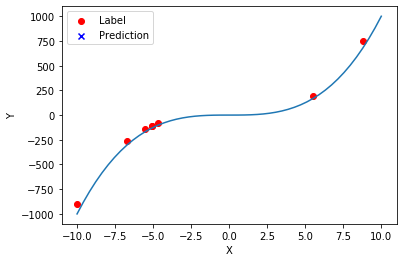

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial

# def plot_data(X, Y):
#     plt.figure() # create a figure
#     plt.scatter(X, Y, c='r') # plot the data in color=red
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.show()

_range = 10

def sample_polynomial_data(m=20, order=3, _range=1):
    coeffs = np.random.randn(order + 1) # initialise random coefficients for each order of the input + a constant offset
    print(Polynomial(coeffs))
    poly_func = np.vectorize(Polynomial(coeffs)) # 
    X = np.random.randn(m)
    Y = poly_func(X)
    return X, Y, coeffs #returns X (the input), Y (labels) and coefficients for each power

m = 5 # how many examples do we want?
order = 3 # how many powers do we want to raise our input data to?
data = np.linspace(-_range, _range, 50)
X = np.random.choice(data, size=(8,))
Y = X**2 + X**3
print('X:',X, '\n')
print('Y:',Y, '\n')

class MultiVariableLinearHypothesis:
    def __init__(self, n_features):
        self.n_features = n_features
        self.b = np.random.randn()
        self.w = np.random.randn(n_features)
    def __call__(self, X): #input is of shape (n_datapoints, n_vars)
        y_hat = np.matmul(X, self.w) + self.b
        return y_hat #output is of shape (n_datapoints, 1)
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b
    def calc_deriv(self, X, y_hat, labels):
        diffs = y_hat-labels
        dLdw = 2 * np.array([np.sum(diffs * X[:, i]) / m for i in range(self.n_features)])                          
        dLdb = 2*np.sum(diffs)/m
        return dLdw, dLdb
                           
def train(num_epochs, X, Y, H):
    for e in range(num_epochs): # for this many complete runs through the dataset
        y_hat = H(X) # make predictions
        dLdw, dLdb = H.calc_deriv(X, y_hat, Y) # calculate gradient of current loss with respect to model parameters
        new_w = H.w - learning_rate * dLdw # compute new model weight using gradient descent update rule
        new_b = H.b - learning_rate * dLdb # compute new model bias using gradient descent update rule
        H.update_params(new_w, new_b) # update model weight and bias
                           
def plot_h_vs_y(X, y_hat, Y):
    fig = plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.plot(datanp.linspace(-_range, _range)**3, data**3)
    plt.scatter(X, y_hat, c='b', label='Prediction', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
def create_polynomial_inputs(X, order=3):
    new_dataset = np.array([X, *[np.power(X, i) for i in range(2, order + 1)]]).T
    return new_dataset # new_dataset should be shape [m, order]
              
num_epochs = 1000
learning_rate = 0.03
highest_order_power = 1

X = create_polynomial_inputs(X, highest_order_power)
H = MultiVariableLinearHypothesis(n_features=highest_order_power)  
    
train(num_epochs, X, Y, H) # train model and plot cost curve
plot_h_vs_y(X, H(X), Y) # plot predictions and true data                           

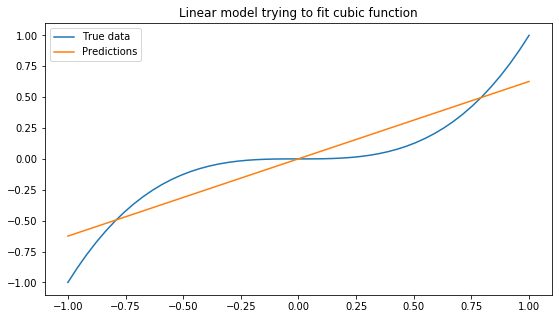

In [29]:
import matplotlib.pyplot as plt
import numpy as np

class LinearModel:
    def __init__(self):
        self.w = np.random.randn()
        self.b = np.random.randn()
        
    def __call__(self, x):
        h = self.w * x + self.b
        return h
        
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b
        
def loss(pred, y):
    return np.mean((pred-y)**2)

def random_search(model, attempts=10000):
    best_loss = float('inf')
    for idx in range(attempts):
        new_w = np.random.rand()
        new_b = np.random.rand()
        model.update_params(new_w, new_b)
        h = model(x)
        l = loss(h, y)
        if l < best_loss:
            best_loss = l
            best_w, best_b = new_w, new_b
    model.update_params(best_w, best_b)
    return model

x = np.linspace(-1, 1)
y = x**3

H = LinearModel()
H = random_search(H)

fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121)
ax1.plot(x, y, label='True data')
ax1.plot(x, H(x), label='Best predictions')
ax1.legend()
ax1.set_title('Linear model trying to fit cubic function')
plt.show()

print('Model weights:', H)

In practice it's very unlikely that we ever actually know the true parameters that define the data generating process. But in this case, because we defined that process, we do know them and we can quantitatively calculate the bias.
We only know in this case because we made it ourselves. But because we do know it right now, we can actually estimate the variance of this model as a demonstration!



Bias is defined as the expected difference between the parameters that we find, and the true parameters that define the data generating distribution.

![title](images/NN1_bias.JPG)
![title](images/computing-bias.jpg)


### Testing Generalisation

We build machine learning algorithms to make predictions. The real measure of success in machine learning is when we can make correct predictions for samples that the model has not seen yet. So lets make a function which will generate us test data by sampling from the same distribution as the training set.

In [1]:
def plot_data(X, Y):
    plt.figure() # create a figure
    plt.scatter(X, Y, c='r') # plot the data in color=red
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def sample_more_polynomial_data(coeffs, m_test=20, rng=3):
    poly_func = np.vectorize(Polynomial(coeffs))
    X = np.random.randn(m_test)*rng
    Y = poly_func(X)
    return X, Y#returns X (the input), Y (labels)

m_test = 20
X_test, Y_test = sample_more_polynomial_data(ground_truth_coeffs, m_test)
print('X:',X_test, '\n')
print('Y:',Y_test, '\n')
plot_data(X_test, Y_test)

NameError: name 'ground_truth_coeffs' is not defined

In [ ]:
X_test_polynomial_augmented = create_polynomial_data(X, highest_order_power)
X_test_normalized = normalize_data(X_polynomial_augmented)
plot_h_vs_y(X, H(X_test_normalized), Y)

## Variance

Sometimes, we have the opposite problem to high bias - high variance. That is, our model's capacity is so high that it can easily fit all the points perfectly, but there are many ways for us to do this. This is called high variance. To reduce this, we can either reduce the capacity of our model. We could also introduce regularization, which we cover in the [next notebook](http://theaicore.com/app/training/regularisation).

![title](images/NN1_variance.JPG)

Again, in practice it's very unlikely that we ever actually know the parameterisation of the data generating distribution. We only know in this case because we made it ourselves. But because we do know it right now, we can actually estimate the variance of this model as a demonstration!


In [ ]:
num_epochs = 1000
learning_rate = 0.03
highest_order_power = 5

X_polynomial_augmented = create_polynomial_data(X, highest_order_power)
X_normalized = normalize_data(X_polynomial_augmented)
H = MultiVariableLinearHypothesis(n_vars=highest_order_power)

In [ ]:
train(num_epochs, X_normalized, Y, H, L)
plot_h_vs_y(X, H(X_normalized), Y)
plot_h_vs_y(X, H(X_test_normalized), Y)

def compute_bias():

def compute_variance():
    for idx in range(100): # train for 100 epochs